In [23]:
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics
import sklearn

In [24]:
labels_df = pd.read_csv('../stats/all-labels.csv')
display(labels_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1
...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0


In [25]:
face_sync_df = pd.read_csv('stats/sync-vid-preds-211105-2210.csv')
display(face_sync_df)

,filename,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,face_no
0,9a22372d22a52397.mp4,0.564207,0.538990,0.367158,0.791909,0
1,9bc4f1306bb8e2cd.mp4,0.542167,0.504413,0.370015,0.713077,0
2,88fe2a902a9d8cc7.mp4,0.513700,0.464985,0.387646,0.641136,0
3,1f3cbda142d0944a.mp4,0.488744,0.470903,0.333023,0.609268,0
4,63bed62257daccaf.mp4,0.487096,0.415824,0.341504,0.647832,0
...,...,...,...,...,...,...
7389,f5c4bfb20068f129.mp4,0.625857,0.702673,0.294314,0.906288,0
7390,b7b7b7f6db7f6e2e.mp4,0.765811,0.862065,0.660070,0.965780,0
7391,c3fc75289ae3b41e.mp4,0.761405,0.817571,0.656039,0.933439,0
7392,519e97d4c90aaa1c.mp4,0.590451,0.543361,0.416230,0.837065,0


In [26]:
face_sync_df = face_sync_df.groupby('filename', sort=False).agg(min)
sync_df = pd.merge(
    left=labels_df, right=face_sync_df, 
    left_on='filename', right_on='filename'
)
# print(np.unique(sync_df['face_no']))
display(sync_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,face_no
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1,0.564207,0.538990,0.367158,0.791909,0
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1,0.542167,0.504413,0.370015,0.713077,0
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1,0.513700,0.464985,0.387646,0.641136,0
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1,0.488744,0.470903,0.333023,0.609268,0
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1,0.487096,0.415824,0.341504,0.647832,0
...,...,...,...,...,...,...,...,...,...,...,...
6911,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.625857,0.702673,0.294314,0.906288,0
6912,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.765811,0.862065,0.660070,0.965780,0
6913,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.761405,0.817571,0.656039,0.933439,0
6914,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.590451,0.543361,0.416230,0.837065,0


(array([ 0.02097559,  0.09089422,  0.06292677,  0.07691049,  0.13284539,
         0.16780471,  0.23772334,  0.2447152 ,  0.25869892,  0.2447152 ,
         0.39154432,  0.37756059,  0.45447108,  0.62227579,  0.6572351 ,
         0.59430834,  0.76211305,  0.81105609,  1.06975501,  1.10471432,
         1.37040511,  1.4473156 ,  1.67804707,  1.92276227,  2.42617639,
         2.33528218,  3.09739522,  3.37706973,  5.18097034, 17.13705573]),
 array([0.37959774, 0.40027781, 0.42095789, 0.44163796, 0.46231804,
        0.48299812, 0.50367819, 0.52435827, 0.54503834, 0.56571842,
        0.58639849, 0.60707857, 0.62775864, 0.64843872, 0.66911879,
        0.68979887, 0.71047894, 0.73115902, 0.7518391 , 0.77251917,
        0.79319925, 0.81387932, 0.8345594 , 0.85523947, 0.87591955,
        0.89659962, 0.9172797 , 0.93795977, 0.95863985, 0.97931992,
        1.        ]),
 <BarContainer object of 30 artists>)

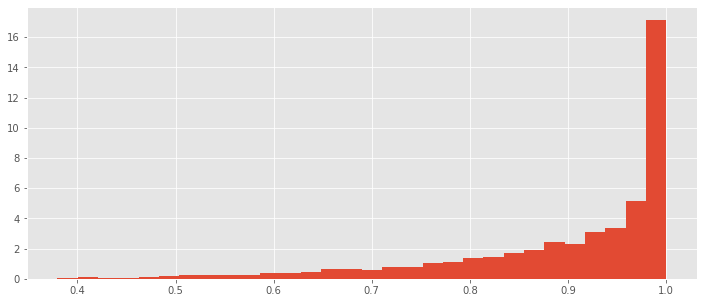

In [27]:
preds = sync_df['3rd_quartile_pred']
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.hist(preds, density=True, bins=30)  # density=False would make counts

In [28]:
rsync_df = sync_df[
    (sync_df['swap_fake'] == 1) |
    (sync_df['label'] == 0)
]
display(rsync_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,face_no
165,18351609de111566.mp4,1,0.0,0.0,1,0,0.832199,0.966656,0.787735,0.999631,0
166,5026338ed12800bc.mp4,1,0.0,0.0,1,0,0.833936,0.947372,0.830766,0.998021,0
167,5968740ef3396f0c.mp4,1,0.0,0.0,1,0,0.830931,0.957452,0.836071,0.996780,0
168,50e301013618719d.mp4,1,0.0,0.0,1,0,0.858643,0.956645,0.766065,0.997484,0
169,bc6dd15cfdfe6175.mp4,1,0.0,0.0,1,0,0.851412,0.961972,0.838287,0.998866,0
...,...,...,...,...,...,...,...,...,...,...,...
6911,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.625857,0.702673,0.294314,0.906288,0
6912,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.765811,0.862065,0.660070,0.965780,0
6913,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.761405,0.817571,0.656039,0.933439,0
6914,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.590451,0.543361,0.416230,0.837065,0


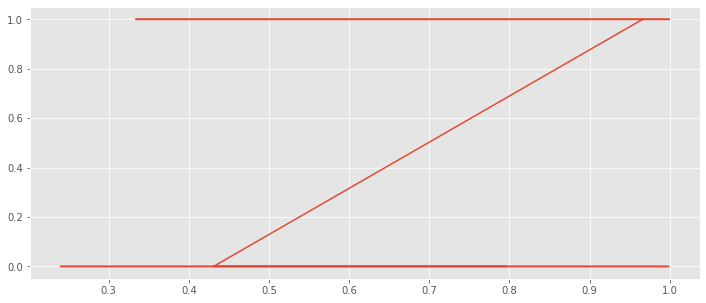

In [29]:
r_preds, r_labels = rsync_df['median_pred'], rsync_df['label']
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.plot(r_preds, r_labels)

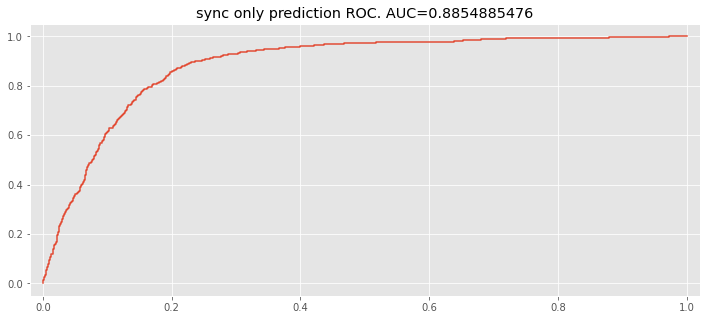

In [30]:
fpr, tpr, _ = sklearn.metrics.roc_curve(r_labels, r_preds)
auc = sklearn.metrics.roc_auc_score(r_labels, r_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("sync only prediction ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

In [31]:
face_sync_df

,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,face_no
filename,,,,,
9a22372d22a52397.mp4,0.564207,0.538990,0.367158,0.791909,0
9bc4f1306bb8e2cd.mp4,0.542167,0.504413,0.370015,0.713077,0
88fe2a902a9d8cc7.mp4,0.513700,0.464985,0.387646,0.641136,0
1f3cbda142d0944a.mp4,0.488744,0.470903,0.333023,0.609268,0
63bed62257daccaf.mp4,0.487096,0.415824,0.341504,0.647832,0
...,...,...,...,...,...
f5c4bfb20068f129.mp4,0.625857,0.702673,0.294314,0.906288,0
b7b7b7f6db7f6e2e.mp4,0.765811,0.862065,0.660070,0.965780,0
c3fc75289ae3b41e.mp4,0.761405,0.817571,0.656039,0.933439,0


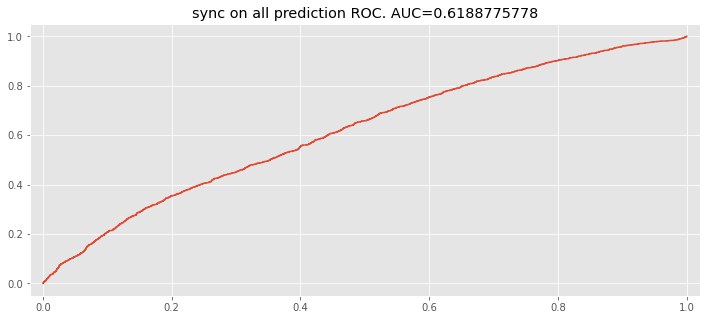

In [32]:
fpr, tpr, _ = sklearn.metrics.roc_curve(sync_df['label'], sync_df['median_pred'])
auc = sklearn.metrics.roc_auc_score(sync_df['label'], sync_df['median_pred'])

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("sync on all prediction ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

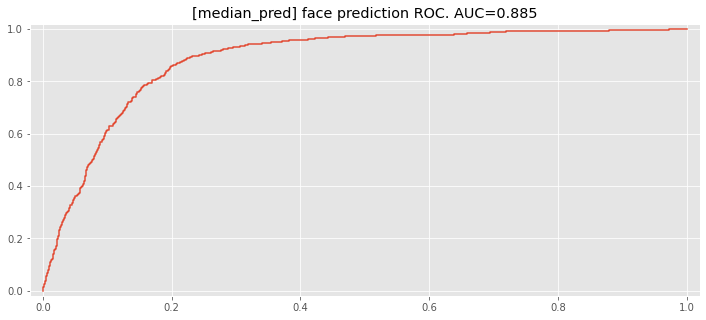

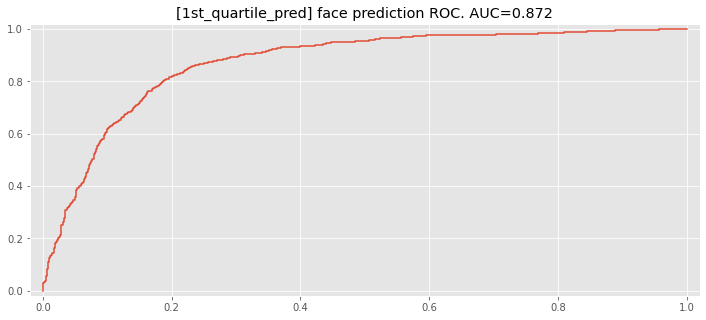

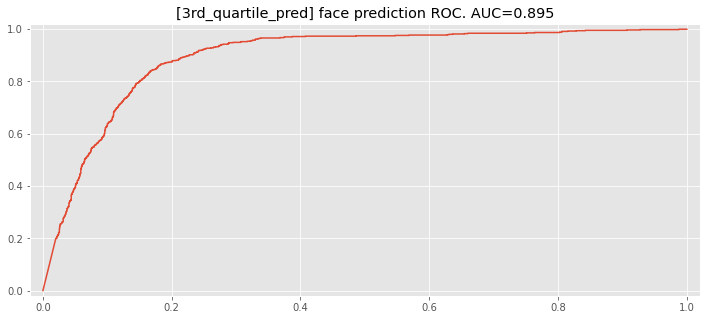

In [33]:
for metric in ['median_pred', '1st_quartile_pred', '3rd_quartile_pred']:
    labels = rsync_df['label'].to_numpy()
    sync_preds = rsync_df[metric].to_numpy()
    fpr, tpr, _ = sklearn.metrics.roc_curve(labels, sync_preds)
    auc = sklearn.metrics.roc_auc_score(labels, sync_preds)

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 5))
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.title(f"[{metric}] face prediction ROC. AUC="+str(round(auc, 3)))
    plt.plot(fpr, tpr)